In [321]:
pip install shap


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [322]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# Predictive modeling tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import shap
# Visual Tools
import matplotlib.pyplot as plt

In [323]:
df =pd.read_csv('StressLevelDataset.csv')
# https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis?resource=download

In [324]:
df.head(2)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2


In [325]:
df.shape

(1100, 21)

In [326]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

## Anova Feature Selection

In [327]:
from sklearn.feature_selection import SelectKBest, f_classif

In [328]:
# Assuming `X` is your features dataframe and `y` is your target variable
X = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
        'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
        'noise_level', 'living_conditions', 'safety', 'basic_needs',
        'academic_performance', 'study_load', 'teacher_student_relationship',
        'future_career_concerns', 'social_support', 'peer_pressure',
        'extracurricular_activities', 'bullying']]
y = df['stress_level']  # Assuming 'stress_level' is the target variable

# Set the number of top features to select
selector = SelectKBest(score_func=f_classif, k=10)  # Selects the top 10 features

# Fit the selector to the data
selector.fit(X, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame for easy visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA_Score': scores, 'p_value': p_values})
feature_scores = feature_scores.sort_values(by='ANOVA_Score', ascending=False)
print(feature_scores)

                         Feature  ANOVA_Score        p_value
5                 blood_pressure  1106.223910  9.277323e-264
1                    self_esteem   775.386130  1.268559e-210
19                      bullying   712.871269  4.227007e-199
6                  sleep_quality   710.124696  1.397301e-198
15        future_career_concerns   684.270952  1.228543e-193
0                  anxiety_level   655.453225  5.296746e-188
3                     depression   652.629287  1.920442e-187
12          academic_performance   639.222921  9.060029e-185
10                        safety   613.634750  1.397009e-179
11                   basic_needs   600.120070  8.543327e-177
4                       headache   570.226316  1.634364e-170
18    extracurricular_activities   549.800151  4.007655e-166
17                 peer_pressure   539.338954  7.633016e-164
14  teacher_student_relationship   513.033251  5.173706e-158
8                    noise_level   440.800303  3.168813e-141
16                social

## Mutual Information

In [329]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [330]:
X = df.drop(columns=['stress_level'])
y = df['stress_level']

In [331]:
# Initialize SelectKBest with the Chi-Square score function and specify the number of top features
k = 10  # Choose the top 10 features (you can adjust this number based on your needs)
chi2_selector = SelectKBest(score_func=chi2, k='all')

# Fit the model and transform the dataset
X_kbest = chi2_selector.fit_transform(X, y)

In [332]:
# Get the Chi-Square scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a DataFrame to view features, scores, and p-values together
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)


                         Feature   Chi2 Score        p-value
1                    self_esteem  2896.821333   0.000000e+00
3                     depression  2839.650025   0.000000e+00
0                  anxiety_level  2023.895604   0.000000e+00
6                  sleep_quality   558.870233  4.394108e-122
19                      bullying   556.215958  1.656683e-121
15        future_career_concerns   538.610421  1.102131e-117
4                       headache   443.612191   4.686371e-97
12          academic_performance   426.865626   2.029117e-93
11                   basic_needs   425.702088   3.630497e-93
10                        safety   419.188604   9.426517e-92
17                 peer_pressure   404.763206   1.278753e-88
18    extracurricular_activities   399.497327   1.779335e-87
14  teacher_student_relationship   384.500562   3.211914e-84
8                    noise_level   326.057116   1.576147e-71
13                    study_load   293.559130   1.796573e-64
16                social

## Linear Regression

In [333]:
X = df[['blood_pressure', 'sleep_quality']]
y = df['stress_level']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [336]:
y_pred = linear_regression_model.predict(X_test)

In [337]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print('Linear Regression')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Linear Regression
Mean Absolute Error (MAE): 0.3286262008966795
Mean Squared Error (MSE): 0.22054235704737415
Root Mean Squared Error (RMSE): 0.4696193746507635
R-squared (R²): 0.6696812600621103


In [338]:
explainer_lr = shap.LinearExplainer(linear_regression_model, X)
shap_values_lr = explainer_lr.shap_values(X)

## Decision Tree Regressor

In [339]:
X = df[['blood_pressure', 'sleep_quality']]
y = df['stress_level']


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [342]:
y_pred = model.predict(X_test)

In [343]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print('Decision Tree Regressor')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Decision Tree Regressor
Mean Absolute Error (MAE): 0.14108960282359267
Mean Squared Error (MSE): 0.1221838467392168
Root Mean Squared Error (RMSE): 0.3495480607001229
R-squared (R²): 0.8169983542572151


In [344]:
explainer_dt = shap.TreeExplainer(model)
shap_values_dt = explainer_dt.shap_values(X)

## Random Forest Regressor

In [345]:
X = df[['blood_pressure', 'sleep_quality']]
y = df['stress_level']

In [346]:
rf_model = RandomForestRegressor(random_state=42, oob_score=True)
rf_model.fit(X, y)

RandomForestRegressor(oob_score=True, random_state=42)

In [347]:
y_pred = rf_model.predict(X_test)

In [348]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print('Random Forest Regressor')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Random Forest Regressor
Mean Absolute Error (MAE): 0.1417722852591438
Mean Squared Error (MSE): 0.12242726317788159
Root Mean Squared Error (RMSE): 0.3498960748249137
R-squared (R²): 0.8166337757137716


In [349]:
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X)


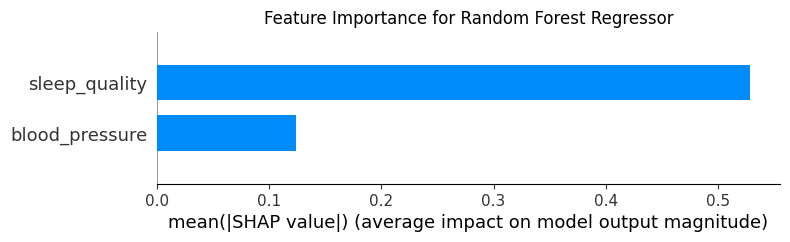

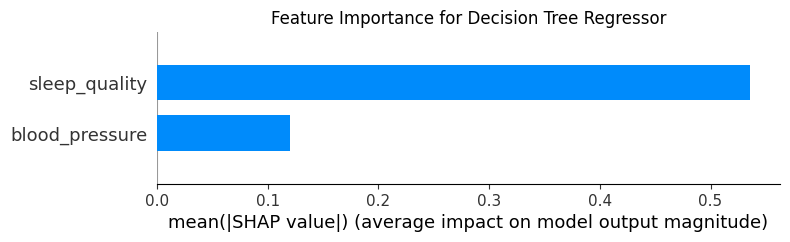

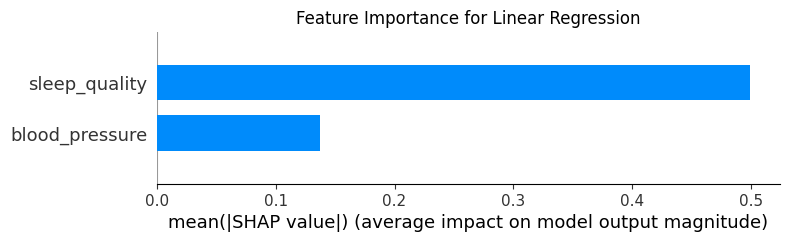

In [350]:
# Random Forest Feature Importance
shap.summary_plot(shap_values_rf, X, plot_type="bar", show=False)
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

# Decision Tree Feature Importance
shap.summary_plot(shap_values_dt, X, plot_type="bar", show=False)
plt.title("Feature Importance for Decision Tree Regressor")
plt.show()

# Linear Regression Feature Importance
shap.summary_plot(shap_values_lr, X, plot_type="bar", show=False)
plt.title("Feature Importance for Linear Regression")
plt.show()

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_force_matplotlib.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


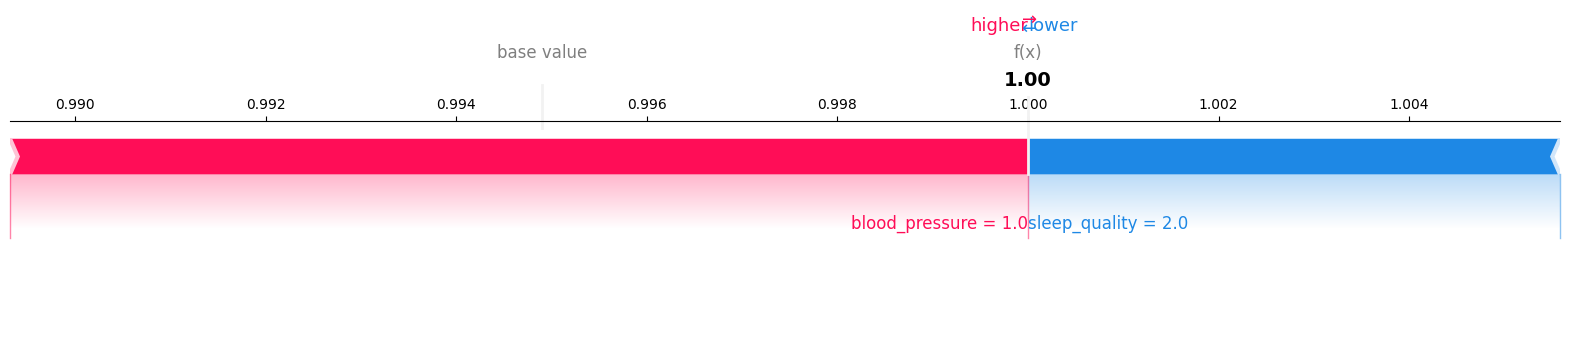

In [351]:
 # Plot SHAP values for an individual prediction (index 0, as an example)
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0], X.iloc[0], matplotlib=True)


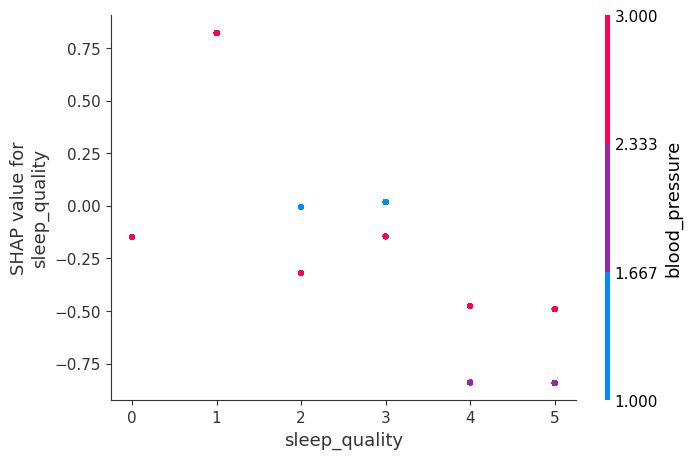

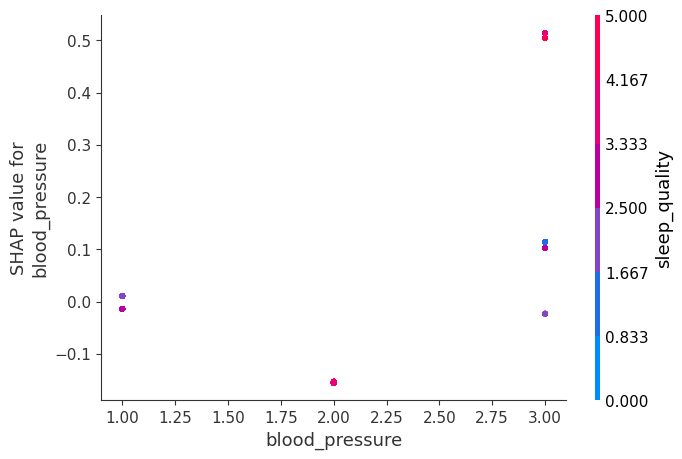

In [352]:
# SHAP Dependence Plot for Random Forest Model
shap.dependence_plot("sleep_quality", shap_values_rf, X)
shap.dependence_plot("blood_pressure", shap_values_rf, X)


### Explaining Individual Predictions (Local Interpretability)

In [354]:
explainer = shap.Explainer(model, X_train)  # Auto-detects the best explainer for the model type


In [355]:
shap_values = explainer(X_train)

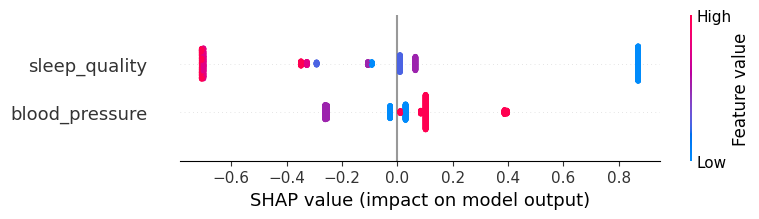

In [356]:
shap.summary_plot(shap_values, X_train)

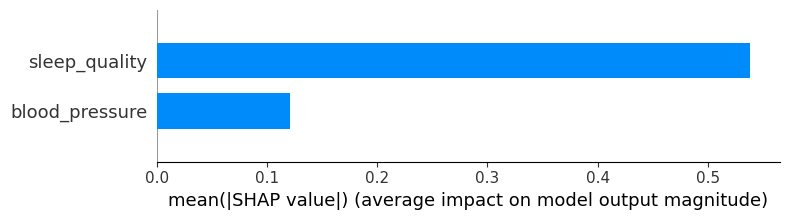

In [368]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


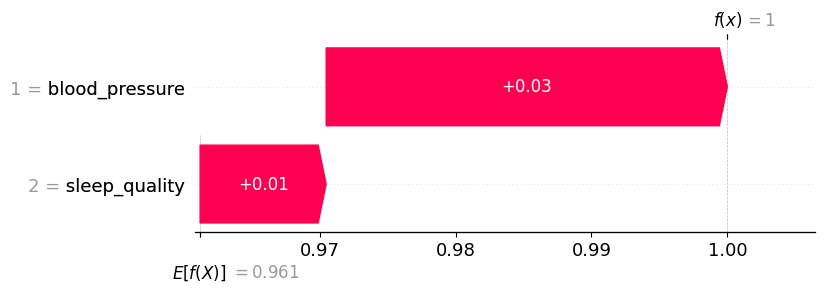

In [360]:
shap.plots.waterfall(shap_values[0])  # For the first instance


### LIME (Local Interpretable Model-Agnostic Explanations)